In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from collections import Counter
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

from skimage import io,data,color
import pandas as pd

import csv


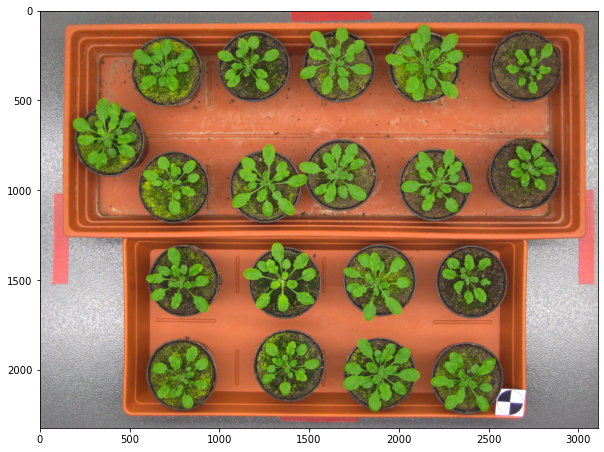

In [2]:

img = cv2.imread("./Ara2012/ara2012_tray16_rgb.png")
# img = cv2.imread("./Ara2013-Canon/ara2013_tray20_rgb.png")
# img = cv2.imread("./Ara2013-RPi/ara2013_tray18_rgb.png")
# img = cv2.imread("./Ara2012/ara2012_tray02_rgb.png")
img_csv = pd.read_csv( './Ara2012/ara2012_tray09_bbox.csv', header= None)
# img_csv = csv.reader( './Ara2012/ara2012_tray01_bbox.csv',delimiter='\t')

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# img_lab = cv2.cvtColor(img_res, cv2.COLOR_BGR2LAB)
plt.figure(figsize=(10,12))

plt.imshow(img_rgb)
plt.show()

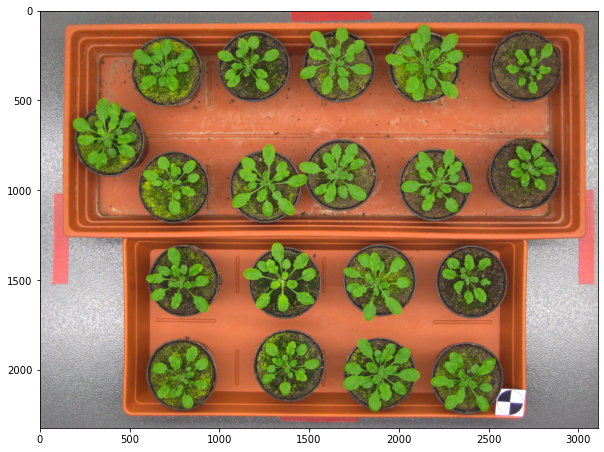

In [3]:
img_rgb =np.array(img_rgb)
plt.figure(figsize=(10,12))
plt.imshow(img_rgb)

In [4]:

# img_z = img_rgb
# Z = img_z.reshape((-1,3))
# # 将数据转化为np.float32
# Z = np.float32(Z)
# # 定义终止标准 聚类数并应用k均值
# criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# K = 36
# ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
# # 现在将数据转化为uint8, 并绘制原图像

# center = np.uint8(center)
# res = center[label.flatten()]

# plt.figure(figsize=(15,15))
# res2 = res.reshape((img_z.shape))

# plt.imshow(res2)

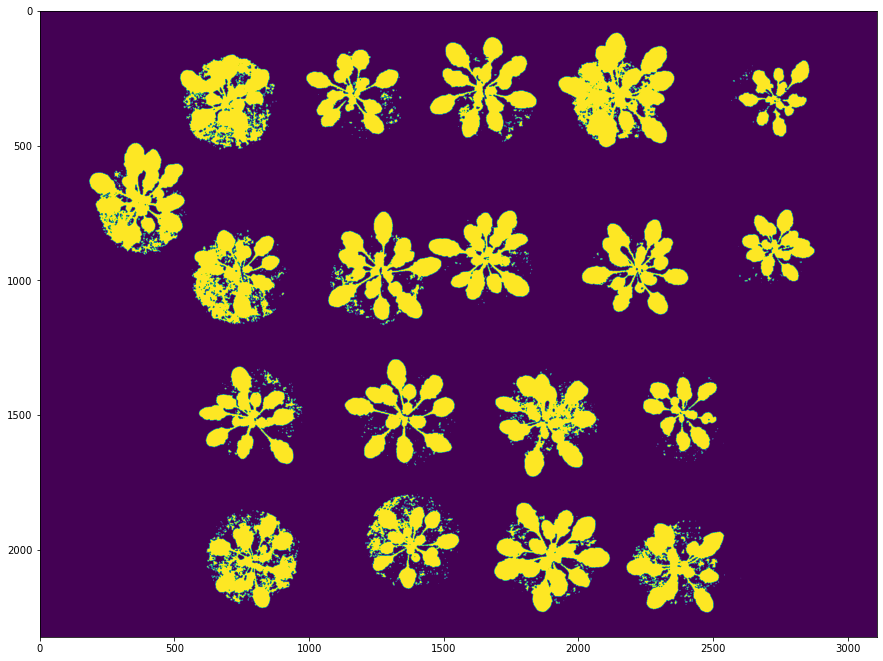

In [5]:
def a_b_tfb(img):
    i = img[:,:,1]
    j = img[:,:,0]
    f = cv2.blur(i, ksize=(3,3)) + (cv2.GaussianBlur(j,(3,3),4) - cv2.GaussianBlur(j,(3,3),1))
    tfb = np.exp(-np.abs(f)/50)
    return np.array([i,j,tfb]).transpose(1,2, 0), tfb

m,n,l = img_rgb.shape

lab = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2LAB)

fs, tfb = a_b_tfb(lab)

X = tfb.reshape((-1,1))
y_hat = KMeans(n_clusters=2, random_state=0).fit_predict(X)
y_hat =y_hat.astype(np.uint8)
img_ = y_hat.reshape((m,n))


plt.figure(figsize=(15,18))
plt.imshow(img_)

plt.show()

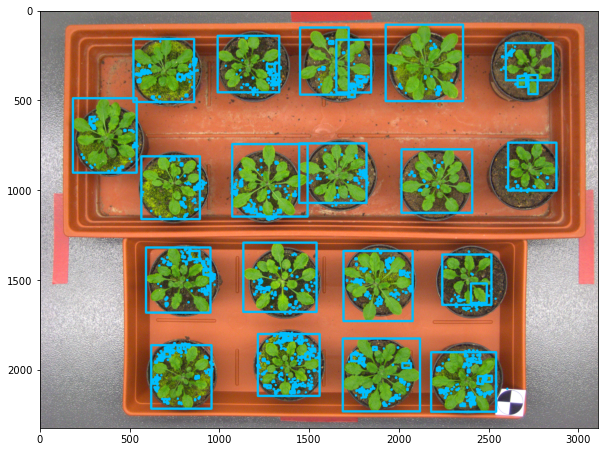

In [6]:
# 只检测外形轮廓cv2.RETR_EXTERNAL 
_,contours, hierarchy = cv2.findContours(img_, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

centers = []
if len(contours) > 0:
    #cv2.boundingRect()返回轮廓矩阵的坐标值，四个值为x, y, w, h， 其中x, y为左上角坐标，w,h为矩阵的宽和高
    
    boxes = [cv2.boundingRect(c) for c in contours] 
    # normal size
#     boxes_min = [cv2.minAreaRect(c) for c in contours]
    
    for box in boxes:
        
        x, y, w, h = box
        cv2.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 191, 255), 12)
        
        centers.append([(x+w/2),(y+h/2)])
    
    plt.figure(figsize=(10,12))
    plt.imshow(img_rgb)

In [5]:
# num_labels, labels = cv2.connectedComponents(img_)

# plt.figure(figsize=(15,18))
# plt.imshow(labels)

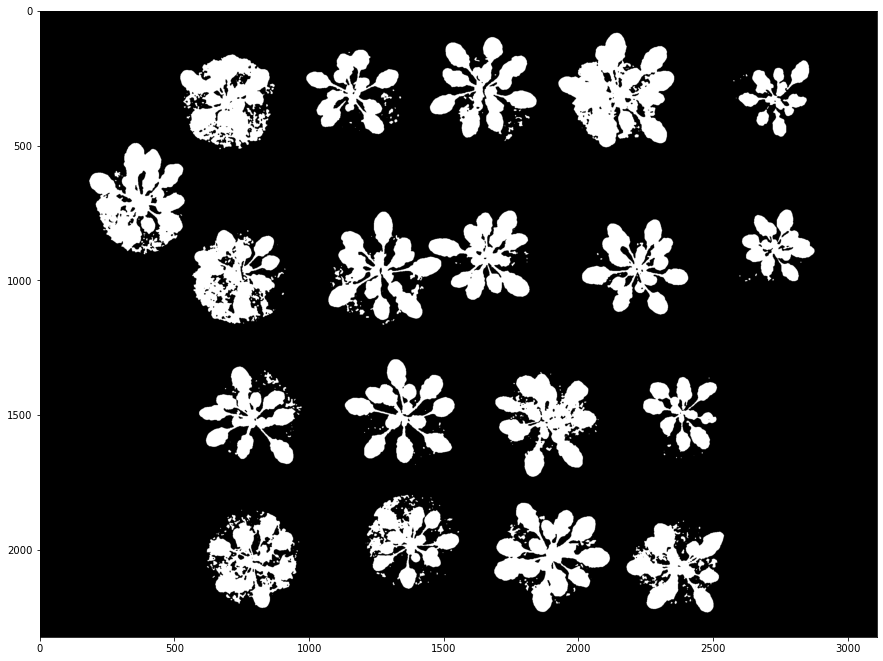

In [6]:
blurred = cv2.GaussianBlur(img_, (9, 9),0)
plt.figure(figsize=(15,18))

plt.imshow(blurred,'gray')

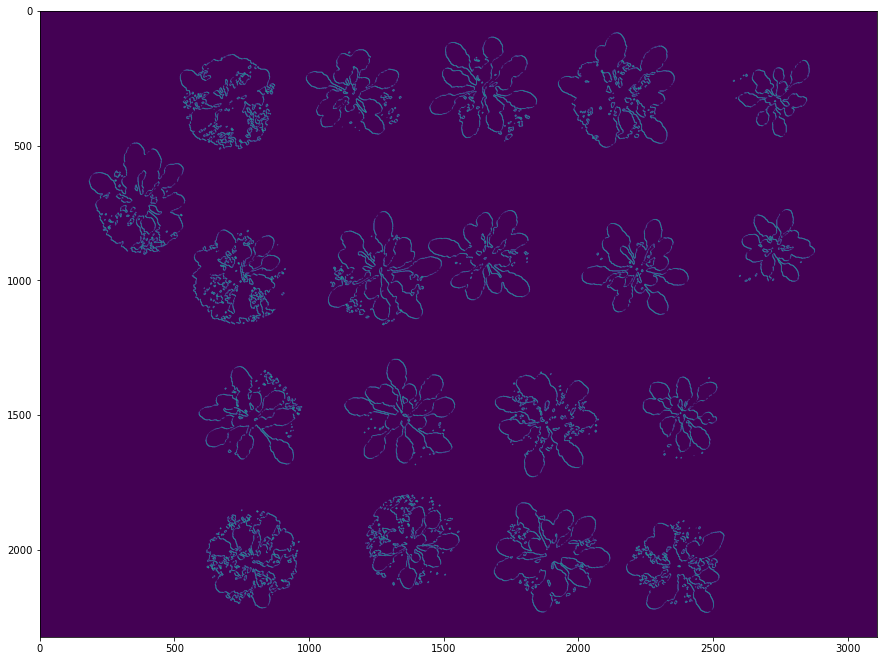

In [7]:

gradX = cv2.Sobel(blurred, ddepth=cv2.CV_32F, dx=1, dy=0)
gradY = cv2.Sobel(blurred, ddepth=cv2.CV_32F, dx=0, dy=1)

gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

plt.figure(figsize=(15,18))

plt.imshow(gradient)

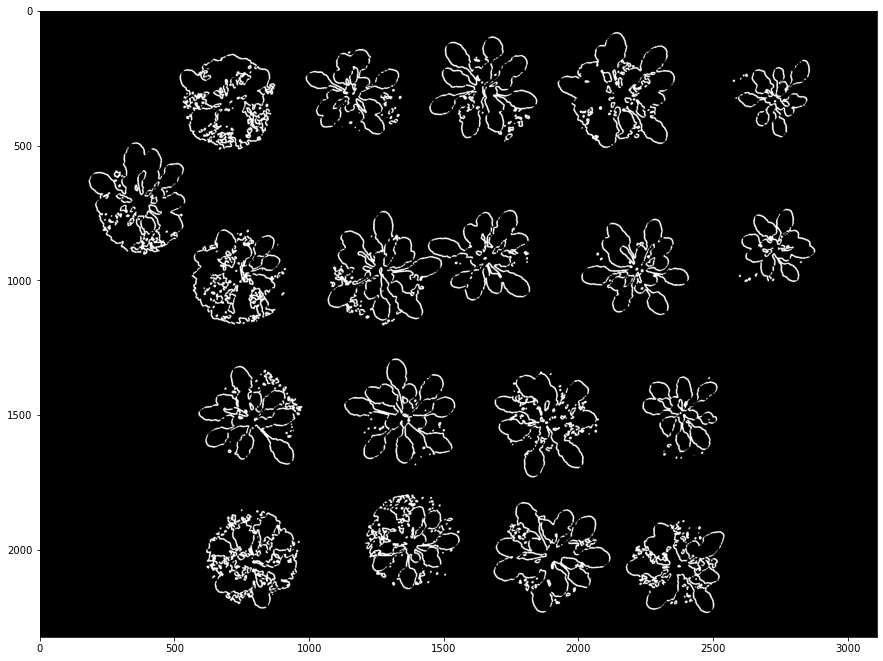

In [8]:
blurred_= cv2.GaussianBlur(gradient, (7, 7),0)
(_, thresh) = cv2.threshold(blurred_, 90, 255, cv2.THRESH_BINARY+ + cv2.THRESH_OTSU)
plt.figure(figsize=(15,18))

plt.imshow(thresh,'gray')


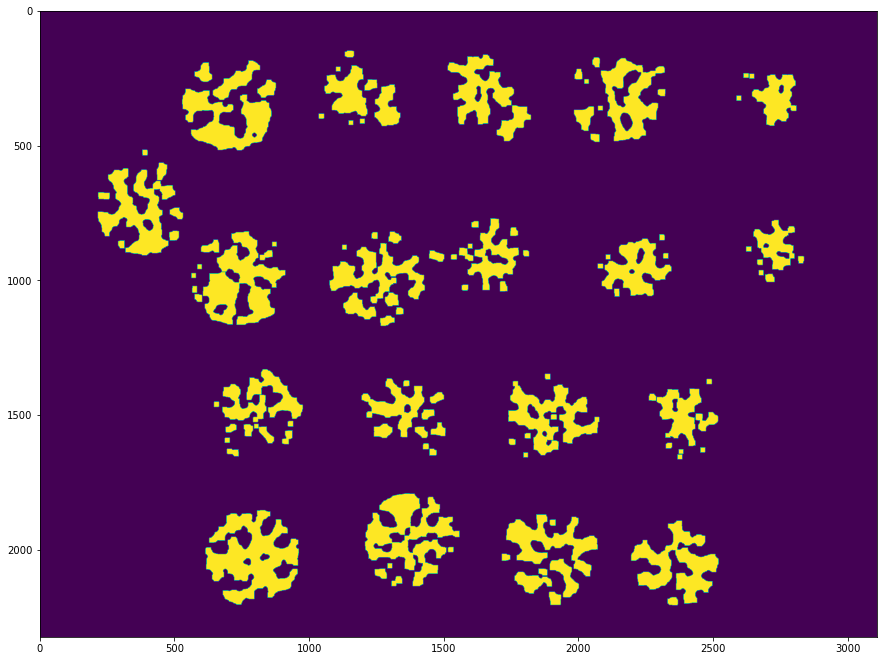

In [9]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (25, 25))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

# closed = cv2.dilate(closed, None, iterations=1)

closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=8)
plt.figure(figsize=(15,18))
plt.imshow(closed)

In [10]:

center_points = []
if len(contours) > 0:
    for cont in contours:   
        box = cv2.minAreaRect(cont)
        points = np.int0(cv2.boxPoints(box))
        # 统计中心位置
        p1x,p1y = points[0,0], points[0,1]
        p3x,p3y = points[2,0], points[2,1]
        center =  [(p1x+p1y )/2,(p3x+p3y)/2]
        center_points.append(center)
        #draw min rectangle 
        cv2.drawContours(img_rgb_res, [points],0, (0,191,255),2)
        
    plt.figure(figsize=(10,12))
    plt.imshow(img_rgb_res)

NameError: name 'contours' is not defined

In [17]:
# row, col, ch = img_rgb_res.shape

# mask1 = np.zeros(img_rgb_res.shape[:2],np.uint8)
# bgdModel = np.zeros((1,65),np.float64)
# fgdModel = np.zeros((1,65),np.float64)

# rect = (40, 40, round(col*0.02), round(row*0.1))

# # 函数返回值是更新的mask，bgdModel，fgdModel
# cv2.grabCut(img_rgb_res, mask1, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)
# mask2 = np.where((mask1==2)|(mask1==0),0,1).astype('uint8')

# plt.figure(figsize=(15,15))
# plt.imshow(img_rgb_res)

In [18]:
# dst = cv2.fastNlMeansDenoisingColored(img_rgb_res,None,10,10,7,21)
# plt.imshow(dst)

In [20]:
# # plt.imshow(c_canny_img,'gray')

# img_temp = cv2.cvtColor(green_1, cv2.COLOR_HSV2BGR)
# img_hsv_2_gray = cv2.cvtColor(img_temp, cv2.COLOR_BGR2GRAY)
# # plt.imshow(img_hsv_2_gray,'gray')
# # plt.show()
# c_canny_img = cv2.Canny(img_hsv_2_gray,50,150, True)
# c_canny_img = cv2.fastNlMeansDenoising(c_canny_img,None,10,7,21)

# plt.imshow(c_canny_img,'gray')

# c_canny_img = cv2.cvtColor(c_canny_img, cv2.COLOR_GRAY2BGR)

# rows,cols,ch = c_canny_img.shape
# img_2 = c_canny_img

# SIZE = 5 #卷积核大小
# P = int(SIZE/2)
# BLACK = [0,0,0]
# WHITE = [255,255,255]
# BEGIN = False
# BP = []
 
# for row in range(P,rows-P,1):
#     for col in range(P,cols-P,1):
#         #print(img[row,col])
        
#         if (img_2[row, col] == WHITE).all():
#             kernal = []
#             for i in range(row-P,row+P+1,1):
#                 for j in range(col-P,col+P+1,1):
#                     kernal.append(img_2[i,j])
#                     if (img_2[i,j] == BLACK).all():
#                         #print(i,j)
#                         BP.append([i,j])
                        
 
# print(len(BP))

# uniqueBP = np.array(list(set([tuple(c) for c in BP])))
# print(len(uniqueBP))
 
# for x,y in uniqueBP:
#     img_2[x,y] = WHITE
    
# plt.imshow(img_2,'gray')

# img1 = img_rgb_res
# img2gray = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)
# # img_temp
# # 
# # print(img2gray.shape)

# mask = cv2.bitwise_and(img1,img1,mask=img2gray)
# plt.imshow(mask,'gray')


In [21]:
# img_temp_1 = cv2.cvtColor(green_1, cv2.COLOR_HSV2BGR)
# mask_inpaint = cv2.cvtColor(img_temp_1, cv2.COLOR_BGR2GRAY)
# plt.imshow(mask_inpaint)

# dst = cv2.fastNlMeansDenoisingColored(img_rgb_res,None,10,10,7,21)

# dst_inpaint =cv2.inpaint(dst,mask_inpaint,3,cv2.INPAINT_TELEA )
# plt.imshow(dst_inpaint)

In [132]:
inp = [{'c1':10, 'c2':100}, {'c1':11, 'c2':110}, {'c1':12, 'c2':123}]
df = pd.DataFrame(inp)

In [133]:
type(df)

pandas.core.frame.DataFrame